FYS-STK project 2\
By David Svejda, Gianmarco Puleo and Henrik Breitenstein

All of the results are generated from scripts in this file

# Finding suitable parameter values

We start by optimising the learningrate, the number of epochs and the regularisation parameter lambda for stochastic gradient descent. First we optimise the learning rate and number of epoch with a small regularisation parameter by looking at how the accuracy and cross-entropy changes based on the parameters.

In [1]:
import Hyper as hp
import optimisers as op
import lrSchedules as lrs
# import numpy as np
import Data
import ActivationFunctions as AF
import plot

## Momentum

Before optimizing the learning rate and number of epochs we need a suitable momentum. To find this we do a small test of different values:

In [2]:
Llist = np.arange(1, 4, 0.5)
Lmd = 1e-4
[lr_range, ep_range] = [np.logspace(-4, 0, 5), np.logspace(1, 2, 5)]
shapes = (64, 10)
train, test, val, train_tar, test_tar, val_tar = Data.load_data()
for L in Llist:
    name = None
    print(f'------------- Momentum = {L} -------------')
    hp.Run(L, lr_range, ep_range, 22, train, train_tar, test, test_tar, hp.Cross_Entropy, shapes, AF.SoftMax(), op.MomentumOptimiser, name, Lmd, 0, 0)

------------- Momentum = 1.0 -------------
.,,,,,.,,,,,.,,,,,.,,,,,.,,,,,

Lr: 0.1 , Epochs: 17.78279410038923, Best Acc: 0.9220055710306406, Best CE: 0.15294275613648103
------------- Momentum = 1.5 -------------
.,,,,,.,,,,,.,,,,,.,,,,,.,,,,,

Lr: 0.1 , Epochs: 10.0, Best Acc: 0.9442896935933147, Best CE: 0.14109393359624223
------------- Momentum = 2.0 -------------
.,,,,,.,,,,,.,,,,,.,,,,,.,,,,,

Lr: 0.1 , Epochs: 56.23413251903491, Best Acc: 0.924791086350975, Best CE: 0.1872213599694304
------------- Momentum = 2.5 -------------
.,,,,,.,,,,,.,,,,,.,,,,,.,,,,,

Lr: 0.1 , Epochs: 31.622776601683793, Best Acc: 0.924791086350975, Best CE: 0.18911837407921217
------------- Momentum = 3.0 -------------
.,,,,,.,,,,,.,,,,,.,,,,,.,,,,,

Lr: 0.1 , Epochs: 10.0, Best Acc: 0.9080779944289693, Best CE: 0.2138984100702457
------------- Momentum = 3.5 -------------
.,,,,,.,,,,,.,,,,,.,,,,,.,,,,,

Lr: 0.1 , Epochs: 100.0, Best Acc: 0.947075208913649, Best CE: 0.1602014780133041


Where we choose $\text{Momentum} = 1.5$ since this had the best accuracy.

## Learning Rate Schedule

For optimizing parameters together with a learning rate schedule we first do a test on a smaller range of parameters to find a suitable value for the number of steps before the learning rate is halved. 

In [10]:
Llist = [0, 1.5] #Momentum
Lmd = 1e-4
[lr_range, ep_range, t1] = [np.logspace(-4, 0, 5), np.logspace(1, 2, 5), np.logspace(3, 2, 10)]
shapes = (64, 10)
train, test, val, train_tar, test_tar, val_tar = Data.load_data()
schedules = [lrs.hyperbolic_lr, lrs.linear_lr, lrs.exponential_lr]
opts = [op.Optimiser, op.MomentumOptimiser]
for n, opt in enumerate(opts):
    print(opt.__name__)
    for schedule in schedules:
        print(f'{schedule.__name__:-^20}')
        for t in t1:
            name = None
            print(f'------------- t1 = {t} -------------')
            hp.Run(Llist[n], lr_range, ep_range, 22, train, train_tar, test, test_tar, hp.Cross_Entropy, shapes, AF.SoftMax(), opt, name, Lmd, t, schedule)


Optimiser
---hyperbolic_lr----
------------- t1 = 1000.0 -------------
.,,,,,.,,,,,.,,,,,.,,,,,.,,,,,

Lr: 0.1 , Epochs: 31.622776601683793, Best Acc: 0.9387186629526463, Best CE: 0.15966933370123856
------------- t1 = 774.263682681127 -------------
.,,,,,.,,,,,.,,,,,.,,,,,.,,,,,

Lr: 0.1 , Epochs: 100.0, Best Acc: 0.935933147632312, Best CE: 0.16003433002200568
------------- t1 = 599.4842503189409 -------------
.,,,,,.,,,,,.,,,,,.,,,,,.,,,,,

Lr: 0.1 , Epochs: 100.0, Best Acc: 0.924791086350975, Best CE: 0.16846270995504561
------------- t1 = 464.15888336127773 -------------
.,,,,,.,,,,,.,,,,,.,,,,,.,,,,,

Lr: 0.1 , Epochs: 56.23413251903491, Best Acc: 0.924791086350975, Best CE: 0.18450111207549996
------------- t1 = 359.38136638046257 -------------
.,,,,,.,,,,,.,,,,,.,,,,,.,,,,,

Lr: 0.1 , Epochs: 56.23413251903491, Best Acc: 0.9442896935933147, Best CE: 0.12441507540991674
------------- t1 = 278.2559402207126 -------------
.,,,,,.,,,,,.,,,,,.,,,,,.,,,,,

Lr: 0.1 , Epochs: 56.234132

.,,,,,.,,,,,.,,,,,.,,,,,.,,,,,

Lr: 0.0001 , Epochs: 10.0, Best Acc: 0.17548746518105848, Best CE: 5.194877015751224
------------- t1 = 129.1549665014884 -------------
.,,,,,.,,,,,.,,,,,.,,,,,.,,,,,

Lr: 0.0001 , Epochs: 17.78279410038923, Best Acc: 0.19498607242339833, Best CE: 6.277686481013536
------------- t1 = 100.0 -------------
.,,,,,.,,,,,.,,,,,.,,,,,.,,,,,

Lr: 1.0 , Epochs: 10.0, Best Acc: 0.298050139275766, Best CE: 5.594926275176305
---exponential_lr---
------------- t1 = 1000.0 -------------
.,,,,,.,,,,,.,,,,,.,,,,,.,,,,,

Lr: 0.1 , Epochs: 100.0, Best Acc: 0.9303621169916435, Best CE: 0.17355724215106857
------------- t1 = 774.263682681127 -------------
.,,,,,.,,,,,.,,,,,.,,,,,.,,,,,

Lr: 0.1 , Epochs: 56.23413251903491, Best Acc: 0.9136490250696379, Best CE: 0.15106861401283164
------------- t1 = 599.4842503189409 -------------
.,,,,,.,,,,,.,,,,,.,,,,,.,,,,,

Lr: 0.1 , Epochs: 56.23413251903491, Best Acc: 0.9220055710306406, Best CE: 0.20915393647682354
------------- t1 

Whith the one best results being

Normal optimiser:

**hyperbolic schedule:** $\Theta = 215$ 

With momentum:

**hyperbolic schedule:** $\Theta = 464$


## Optimising the learning rate and the number of epochs
We are then ready to do the optimazation for five different optimisers: Momentum Optimiser, AdaGrad, Adam, RMSProp and Learning Rate Schedule optimiser. First we take a look at the results from each optimization step for the optimiser with momentum. The momentum was set to $1.5$ after testing a small range of momentums. With theregularisation parameter set to $\lambda = 10^{-4}$ we get the following heat map for accuracy and cross-entropy respectivly.

In [5]:
[lr_range, ep_range] = [np.logspace(-4, 0, 10), np.logspace(2, 3, 10)]
Lmd = 1e-4

In [4]:
#Optimiser
hp.SendToLrEpoch(0, 215, lrs.hyperbolic_lr, op.Optimiser, lr_range, ep_range, Lmd, 'Optimiser')

.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,

Lr: 0.046415888336127774 , Epochs: 774.263682681127, Best Acc: 0.5181058495821727, Best CE: 3.726594422982391


In [9]:
#MomentumOptimiser
hp.SendToLrEpoch(1.5, 464, lrs.hyperbolic_lr, op.MomentumOptimiser, lr_range, ep_range, Lmd, 'MomentumOptimiser')

.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,

Lr: 0.046415888336127774 , Epochs: 1000.0, Best Acc: 0.6935933147632312, Best CE: 2.1415721445518874


In [6]:
#AdaGradOptimiser
hp.SendToLrEpoch(0, 0, 0, op.AdaGradOptimiser, lr_range, ep_range, Lmd, 'AdaGradOptimiser')

.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,

Lr: 0.046415888336127774 , Epochs: 464.15888336127773, Best Acc: 0.7966573816155988, Best CE: 1.1940330588391206


In [11]:
#AdamOptimiser
hp.SendToLrEpoch(0, 0, 0, op.AdamOptimiser, lr_range, ep_range, Lmd, 'AdamOptimiser')

.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,

Lr: 0.002154434690031882 , Epochs: 1000.0, Best Acc: 0.9498607242339833, Best CE: 0.11406188868276493


In [12]:
#RMSPropOptimiser
hp.SendToLrEpoch(0, 0, 0, op.RMSPropOptimiser, lr_range, ep_range, Lmd, 'RMSPropOptimiser')

.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,

Lr: 0.002154434690031882 , Epochs: 1000.0, Best Acc: 0.947075208913649, Best CE: 0.09310834295409347


We plot them:

In [6]:
from plot import *
import os

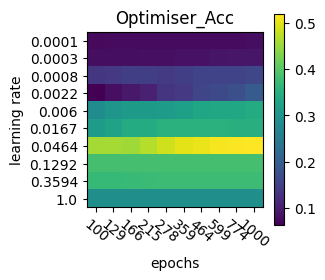

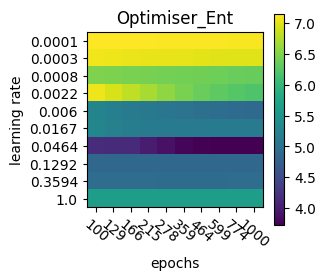

In [7]:
opt = 'Optimiser'
base = f'Data/NrHidden0/{opt}/LrEpoch'
plot_lr_epochs(f'{base}/Acc_{opt}.npy', f"{opt}_Acc.png", f"{opt}_Acc", f"Data/Plots/{opt}_Acc.png")
plot_lr_epochs(f'{base}/Ent_{opt}.npy', f"{opt}_Ent.png", f"{opt}_Ent", f"Data/Plots/{opt}_Ent.png")

Where we choose: Lr $= 0.05$ and Epochs $= 1000$.

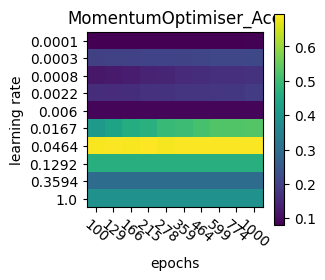

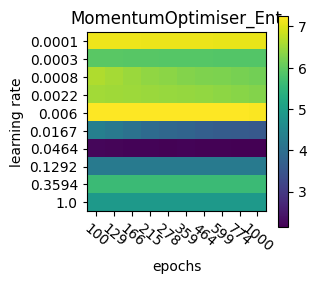

In [13]:
opt = 'MomentumOptimiser'
base = f'Data/NrHidden0/{opt}/LrEpoch'
plot_lr_epochs(f'{base}/Acc_{opt}.npy', f"{opt}_Acc.png", f"{opt}_Acc", f"Data/Plots/{opt}_Acc.png")
plot_lr_epochs(f'{base}/Ent_{opt}.npy', f"{opt}_Ent.png", f"{opt}_Ent", f"Data/Plots/{opt}_Ent.png")

Where we choose: Lr $= 0.05$ and Epochs $= 100$.

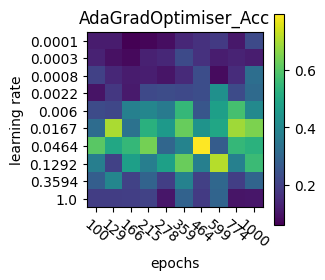

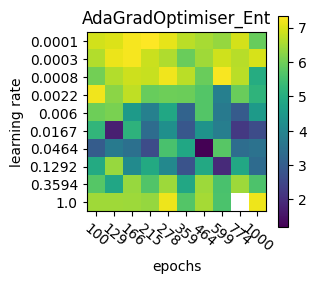

In [10]:
opt = 'AdaGradOptimiser'
base = f'Data/NrHidden0/{opt}/LrEpoch'
plot_lr_epochs(f'{base}/Acc_{opt}.npy', f"{opt}_Acc.png", f"{opt}_Acc", f"Data/Plots/{opt}_Acc.png")
plot_lr_epochs(f'{base}/Ent_{opt}.npy', f"{opt}_Ent.png", f"{opt}_Ent", f"Data/Plots/{opt}_Ent.png")

Where we choose: Lr $= 0.05$ and Epochs $= 470$.

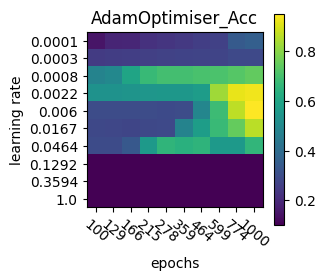

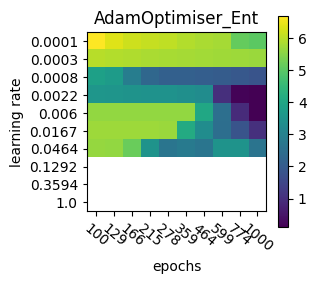

In [14]:
opt = 'AdamOptimiser'
base = f'Data/NrHidden0/{opt}/LrEpoch'
plot_lr_epochs(f'{base}/Acc_{opt}.npy', f"{opt}_Acc.png", f"{opt}_Acc", f"Data/Plots/{opt}_Acc.png")
plot_lr_epochs(f'{base}/Ent_{opt}.npy', f"{opt}_Ent.png", f"{opt}_Ent", f"Data/Plots/{opt}_Ent.png")

Where we choose: Lr $= 0.006$ and Epochs $= 1000$.

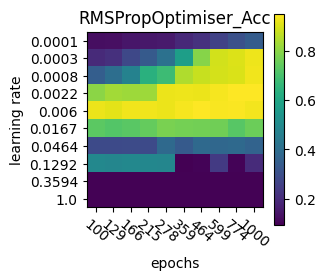

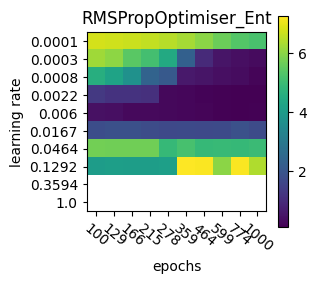

In [15]:
opt = 'RMSPropOptimiser'
base = f'Data/NrHidden0/{opt}/LrEpoch'
plot_lr_epochs(f'{base}/Acc_{opt}.npy', f"{opt}_Acc.png", f"{opt}_Acc", f"Data/Plots/{opt}_Acc.png")
plot_lr_epochs(f'{base}/Ent_{opt}.npy', f"{opt}_Ent.png", f"{opt}_Ent", f"Data/Plots/{opt}_Ent.png")

Where we choose: Lr $= 0.002$ and Epochs $= 780$.

## Optimising Lambda

With these we optimize for the regularisation parameter $\lambda$

In [ ]:
#Optimiser Momentum, Lr, Epochs, t1
hp.SendToLambda(0, 0.05, 1000, 215, op.Optimiser, lrs.hyperbolic_lr)

..................................................

In [ ]:
#MomentumOptimiser Momentum, Lr, Epochs, t1, opt, LrSchedule
hp.SendToLambda(1.5, 0.05, 100, 464, op.MomentumOptimiser, lrs.hyperbolic_lr)

In [2]:
#AdaGradOptimiser Momentum, Lr, Epochs, t1, opt, LrSchedule
hp.SendToLambda(0, 0.05, 470, 0, op.AdaGradOptimiser, 0)

..................................................

Lmd: 0.00013894954943731373, Best Acc: 0.9080779944289693, Best CE: 0.8969359331476323


In [ ]:
#AdamOptimiser Momentum, Lr, Epochs, t1, opt, LrSchedule
hp.SendToLambda(0, 0.006, 1000, 0, op.AdamOptimiser, 0)

In [ ]:
#RMSPropOptimiser Momentum, Lr, Epochs, t1, opt, LrSchedule
hp.SendToLambda(0, 0.002, 780, 0, op.RMSPropOptimiser, 0)

We then plot the result

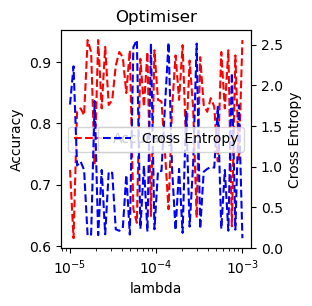

In [11]:
opt = 'Optimiser'
base = f'Data/NrHidden0/{opt}/Lambda'
plot.plot_lamda(f'{base}/Acc_Ent.npy', f'{opt}', f'Data/Plots/{opt}Lambda.png')

We then choose $\lambda = 3*10^{-5}$ for the normal optimiser.

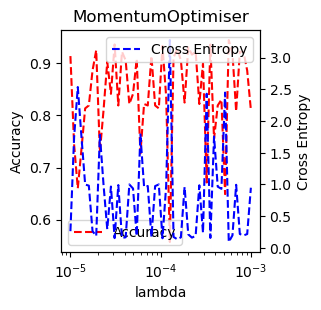

In [12]:
opt = 'MomentumOptimiser'
base = f'Data/NrHidden0/{opt}/Lambda'
plot.plot_lamda(f'{base}/Acc_Ent.npy', f'{opt}', f'Data/Plots/{opt}Lambda.png')

We then choose $\lambda = 4*10^{-5}$ for optimiser with momentum.

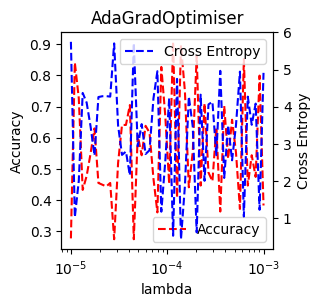

In [4]:
opt = 'AdaGradOptimiser'
base = f'Data/NrHidden0/{opt}/Lambda'
plot.plot_lamda(f'{base}/Acc_Ent.npy', f'{opt}', f'Data/Plots/{opt}Lambda.png')

We then choose $\lambda = 2*10^{-5}$ for AdaGradOptimiser.

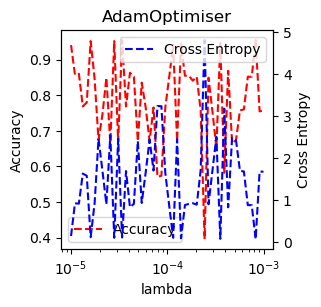

In [14]:
opt = 'AdamOptimiser'
base = f'Data/NrHidden0/{opt}/Lambda'
plot.plot_lamda(f'{base}/Acc_Ent.npy', f'{opt}', f'Data/Plots/{opt}Lambda.png')

We then choose $\lambda = 3*10^{-5}$ for AdamOptimiser.

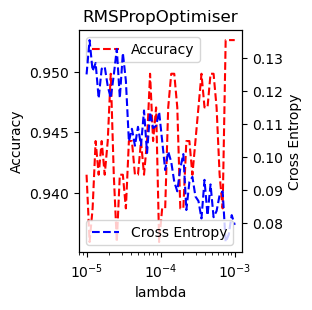

In [16]:
opt = 'RMSPropOptimiser'
base = f'Data/NrHidden0/{opt}/Lambda'
plot.plot_lamda(f'{base}/Acc_Ent.npy', f'{opt}', f'Data/Plots/{opt}Lambda.png')

We then choose $\lambda = 10^{-3}$ for RMSPropOptimiser.

With these we can now do another scan of the learning rate and number of epochs.

In [5]:
[lr_range, ep_range] = [np.logspace(-2, 0, 10), np.logspace(1, 2.5, 10)]
#Optimiser
Lmd = 3e-5
hp.SendToLrEpoch(0, 215, lrs.hyperbolic_lr, op.Optimiser, lr_range, ep_range, Lmd, 'OptimiserNr2')

.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,

Lr: 0.3593813663804626 , Epochs: 100.0, Best Acc: 0.7325905292479109, Best CE: 1.9659763653293258


In [6]:
[lr_range, ep_range] = [np.logspace(-2, -1, 10), np.logspace(1, 2.5, 10)]
Lmd = 4e-5
#MomentumOptimiser
hp.SendToLrEpoch(0, 464, lrs.hyperbolic_lr, op.MomentumOptimiser, lr_range, ep_range, Lmd, 'MomentumOptimiserNr2')

.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,

Lr: 0.1 , Epochs: 68.12920690579611, Best Acc: 0.6991643454038997, Best CE: 2.100653351542234


In [ ]:
[lr_range, ep_range] = [np.logspace(-3, -1, 10), np.logspace(1, 2.5, 10)] #10^2.5 approx 300
Lmd = 2e-5
#AdaGradOptimiser
hp.SendToLrEpoch(0, 0, 0, op.AdaGradOptimiser, lr_range, ep_range, Lmd, 'AdaGradOptimiserNr2')

In [ ]:
[lr_range, ep_range] = [np.logspace(-4, -3, 10), np.logspace(2.6, 2.9, 10)]
Lmd = 3e-5
#AdamOptimiser
hp.SendToLrEpoch(0, 0, 0, op.AdamOptimiser, lr_range, ep_range, Lmd, 'AdamOptimiserNr2')

In [ ]:
[lr_range, ep_range] = [np.logspace(-3, -2, 10), np.logspace(2.8, 3, 10)] #10^2.8 = 630
Lmd = 1e-3
#RMSPropOptimiser
hp.SendToLrEpoch(0, 0, 0, op.RMSPropOptimiser, lr_range, ep_range, Lmd, 'RMSPropOptimiserNr2')

We then plot them

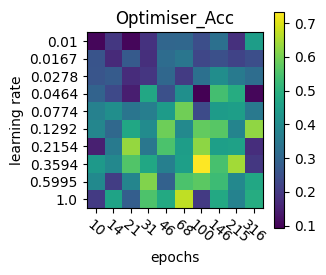

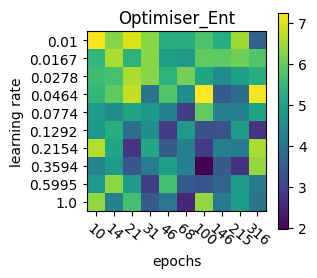

In [19]:
opt = 'Optimiser'
base = f'Data/NrHidden0/{opt}/LrEpoch'
plot.plot_lr_epochs(f'{base}/Acc_{opt}Nr2.npy', f'{opt}', f'{opt}_Acc', f'Data/Plots/2nd{opt}Acc.png')
plot.plot_lr_epochs(f'{base}/Ent_{opt}Nr2.npy', f'{opt}', f'{opt}_Ent', f'Data/Plots/2nd{opt}Ent.png')

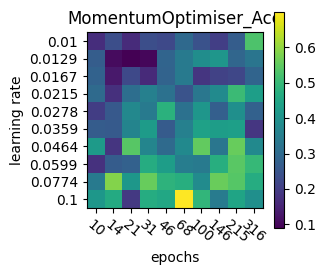

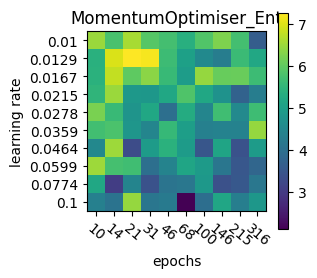

In [20]:
opt = 'MomentumOptimiser'
base = f'Data/NrHidden0/{opt}/LrEpoch'
plot.plot_lr_epochs(f'{base}/Acc_{opt}Nr2.npy', f'{opt}', f'{opt}_Acc', f'Data/Plots/2nd{opt}Acc.png')
plot.plot_lr_epochs(f'{base}/Ent_{opt}Nr2.npy', f'{opt}', f'{opt}_Ent', f'Data/Plots/2nd{opt}Ent.png')

# One hidden layer

We have studied the performance of the Logistic regression, but now we want to see if we can do better with a \"real\" neural net. We add a hidden layer with 25 nodes, because 25 is about half way between 10 and 64, geometrically.

In [1]:
import Hyper as hp
import optimisers as op
import lrSchedules as lrs
import numpy as np
import Data
import ActivationFunctions as AF
import plot

In [2]:
[lr_range, ep_range] = [np.logspace(-2, 2, 10), np.logspace(2, 3, 10)]
Lmd = 1e-4
shape = (64, 25, 10)
#Optimiser
hp.NetworkToLrEpoch(0, 215, lrs.hyperbolic_lr, op.Optimiser, lr_range, ep_range,
                    Lmd,'Optimiser_sigmoid', AF.Sigmoid(), shape)

.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,

Lr: 35.93813663804626 , Epochs: 1000.0, Best Acc: 0.9275766016713092, Best CE: 0.11401877741231868


In [2]:
[lr_range, ep_range] = [np.logspace(-2, 2, 10), np.logspace(2, 3, 10)]
Lmd = 1e-4
shape = (64, 25, 10)
#MomentumOptimiser
hp.NetworkToLrEpoch(1.5, 464, lrs.hyperbolic_lr, op.MomentumOptimiser, lr_range, ep_range,
                 Lmd, 'MomentumOptimiser_sigmoid', AF.Sigmoid(), shape)

.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,

Lr: 1.6681005372000592 , Epochs: 100.0, Best Acc: 0.9387186629526463, Best CE: 0.135633201909392


In [3]:
[lr_range, ep_range] = [np.logspace(-2, 2, 10), np.logspace(2, 3, 10)]
Lmd = 1e-4
shape = (64, 25, 10)
#AdaGradOptimiser
hp.NetworkToLrEpoch(0, 0, 0, op.AdaGradOptimiser, lr_range, ep_range,
                 Lmd, 'AdaGradOptimiser_sigmoid', AF.Sigmoid(), shape)

.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,

Lr: 0.21544346900318834 , Epochs: 1000.0, Best Acc: 0.9749303621169917, Best CE: 0.04623207952632097


In [11]:
[lr_range, ep_range] = [np.logspace(-4, 0, 10), np.logspace(2, 3, 10)]
Lmd = 1e-4
shape = (64, 25, 10)
#AdamOptimiser
hp.NetworkToLrEpoch(0, 0, 0, op.AdamOptimiser, lr_range, ep_range,
                 Lmd, 'AdamOptimiser_sigmoid', AF.Sigmoid(), shape)

.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,

Lr: 0.016681005372000592 , Epochs: 774.263682681127, Best Acc: 0.9665738161559888, Best CE: 0.0530268939592448


In [12]:
[lr_range, ep_range] = [np.logspace(-4, 0, 10), np.logspace(2, 3, 10)]
Lmd = 1e-4
shape = (64, 25, 10)
#RMSPropOptimiser
hp.NetworkToLrEpoch(0, 0, 0, op.RMSPropOptimiser, lr_range, ep_range,
                    Lmd, 'RMSPropOptimiser_sigmoid', AF.Sigmoid(), shape)

.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,

Lr: 0.005994842503189409 , Epochs: 359.38136638046257, Best Acc: 0.9777158774373259, Best CE: 0.043212496973005436


We plot them:

In [6]:
from plot import *
import os

target = f"Data/Plots/NrHidden1/"
os.makedirs(target, exist_ok=True)

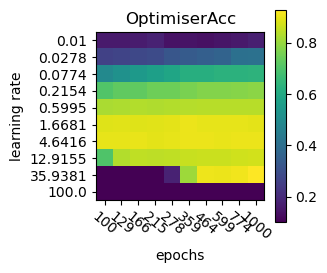

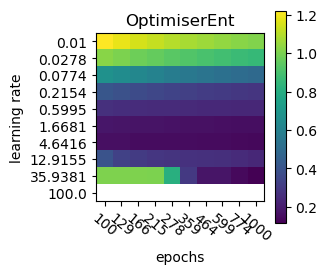

In [7]:
opt = 'Optimiser'
base = f'Data/NrHidden1/{opt}/LrEpoch'
for item in os.listdir(base):
    plot_lr_epochs(f'{base}/{item}', f"{opt}{item[:3]}.png", f"{opt}{item[:3]}", f"{target}{opt}{item[:3]}.png")

We will further investigate the effect of lambda around $Lr = 4$ and $epochs = 500$

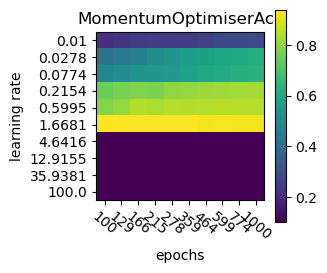

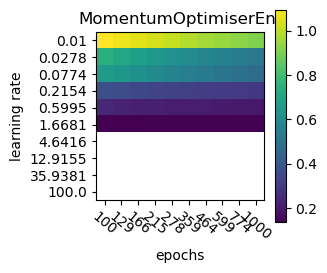

In [7]:
opt = 'MomentumOptimiser'
base = f'Data/NrHidden1/{opt}/LrEpoch'
for item in os.listdir(base):
    plot_lr_epochs(f'{base}/{item}', f"{opt}{item[:3]}.png", f"{opt}{item[:3]}", f"{target}{opt}{item[:3]}.png")

We will further investigate the effect of lambda around $Lr = 1$ and $epochs = 300$

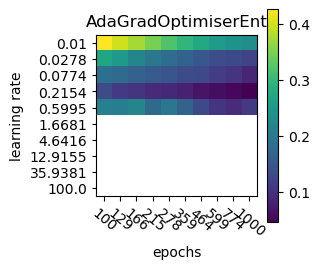

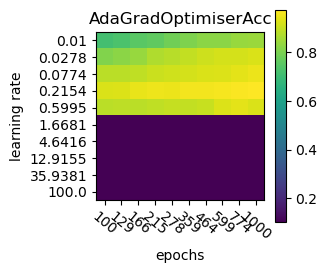

In [8]:
opt = 'AdaGradOptimiser'
base = f'Data/NrHidden1/{opt}/LrEpoch'
for item in os.listdir(base):
    plot_lr_epochs(f'{base}/{item}', f"{opt}{item[:3]}.png", f"{opt}{item[:3]}", f"{target}{opt}{item[:3]}.png")

We will further investigate the effect of lambda around $Lr = 0.2$ and $epochs = 1000$

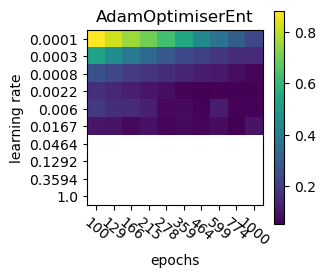

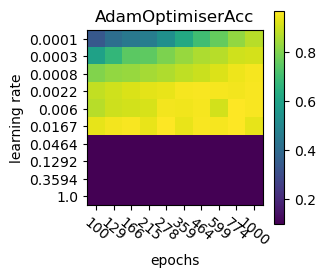

In [13]:
opt = 'AdamOptimiser'
base = f'Data/NrHidden1/{opt}/LrEpoch'
for item in os.listdir(base):
    plot_lr_epochs(f'{base}/{item}', f"{opt}{item[:3]}.png", f"{opt}{item[:3]}", f"{target}{opt}{item[:3]}.png")

We will further investigate the effect of lambda around $Lr = 0.01$ and $epochs = 600$

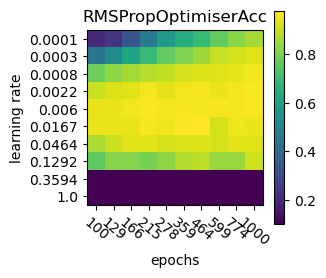

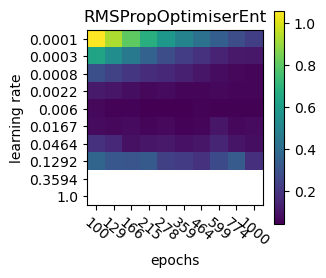

In [14]:
opt = 'RMSPropOptimiser'
base = f'Data/NrHidden1/{opt}/LrEpoch'
for item in os.listdir(base):
    plot_lr_epochs(f'{base}/{item}', f"{opt}{item[:3]}.png", f"{opt}{item[:3]}", f"{target}{opt}{item[:3]}.png")

We will further investigate the effect of lambda around $Lr = 0.01$ and $epochs = 500$

## Optimising Lambda
We will now test some values of lambda with the values of Lr and the number of epochs as found by the previous set of calculations

In [1]:
import Hyper as hp
import optimisers as op
import lrSchedules as lrs
import ActivationFunctions as AF

In [2]:
shape = (64, 25, 10)
# Momentum, Learning rate, Epochs, Learning rate schedule parameter, optimiser, Learning rate schedule, activation function, shape
hp.NetworkToLambda(0, 4, 500, 215, op.Optimiser, lrs.hyperbolic_lr, AF.Sigmoid(), shape)

..................................................

Lmd: 0.0006250551925273969, Best Acc: 0.9721448467966574, Best CE: 0.9665738161559888


In [3]:
shape = (64, 25, 10)
# Momentum, Learning rate, Epochs, Learning rate schedule parameter, optimiser, Learning rate schedule, activation function, shape
hp.NetworkToLambda(1.5, 1, 300, 450, op.MomentumOptimiser, lrs.hyperbolic_lr, AF.Sigmoid(), shape)

..................................................

Lmd: 0.0009102981779915217, Best Acc: 0.947075208913649, Best CE: 0.9442896935933147


In [4]:
shape = (64, 25, 10)
# Momentum, Learning rate, Epochs, Learning rate schedule parameter, optimiser, Learning rate schedule, activation function, shape
hp.NetworkToLambda(0, 0.2, 1000, 0, op.AdaGradOptimiser, 0, AF.Sigmoid(), shape)

..................................................

Lmd: 0.00020235896477251554, Best Acc: 0.9749303621169917, Best CE: 0.9610027855153204


In [5]:
shape = (64, 25, 10)
# Momentum, Learning rate, Epochs, Learning rate schedule parameter, optimiser, Learning rate schedule, activation function, shape
hp.NetworkToLambda(0, 0.01, 600, 0, op.AdamOptimiser, 0, AF.Sigmoid(), shape)

..................................................

Lmd: 0.00013894954943731373, Best Acc: 0.9749303621169917, Best CE: 0.958217270194986


In [7]:
shape = (64, 25, 10)
# Momentum, Learning rate, Epochs, Learning rate schedule parameter, optimiser, Learning rate schedule, activation function, shape
hp.NetworkToLambda(0, 0.01, 500, 0, op.RMSPropOptimiser, 0, AF.Sigmoid(), shape)

...................................

And then we plot the data

In [2]:
from plot import *
import os

target = f"Data/Plots/NrHidden1/"
os.makedirs(target, exist_ok=True)

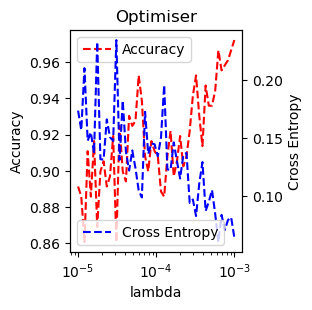

In [3]:
opt = 'Optimiser'
base = f'Data/NrHidden1/{opt}/Lambda'
plot_lamda(f'{base}/Acc_Ent.npy', f'{opt}', f'{target}{opt}Lambda.png')

Based on this we choose $\lambda = 1*10^{-3}$

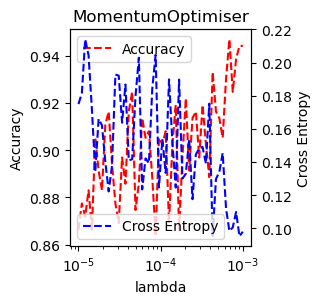

In [4]:
opt = 'MomentumOptimiser'
base = f'Data/NrHidden1/{opt}/Lambda'
plot_lamda(f'{base}/Acc_Ent.npy', f'{opt}', f'{target}{opt}Lambda.png')

Based on this we choose $\lambda = 1*10^{-3}$

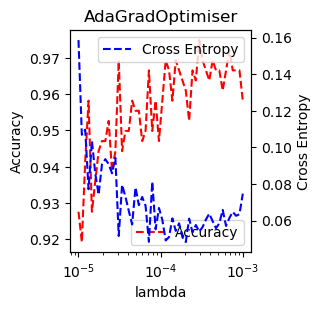

In [5]:
opt = 'AdaGradOptimiser'
base = f'Data/NrHidden1/{opt}/Lambda'
plot_lamda(f'{base}/Acc_Ent.npy', f'{opt}', f'{target}{opt}Lambda.png')

Based on this we choose $\lambda = 4*10^{-4}$

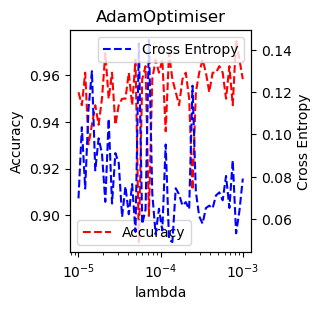

In [6]:
opt = 'AdamOptimiser'
base = f'Data/NrHidden1/{opt}/Lambda'
plot_lamda(f'{base}/Acc_Ent.npy', f'{opt}', f'{target}{opt}Lambda.png')

Based on this we choose $\lambda = 1*10^{-3}$

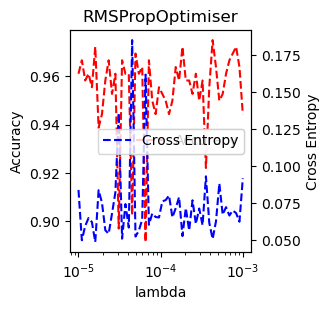

In [8]:
opt = 'RMSPropOptimiser'
base = f'Data/NrHidden1/{opt}/Lambda'
plot_lamda(f'{base}/Acc_Ent.npy', f'{opt}', f'{target}{opt}Lambda.png')

Based on this we choose $\lambda = 4*10^{-4}$

In [ ]:
import Hyper as hp
import optimisers as op
import lrSchedules as lrs
import numpy as np
import Data
import ActivationFunctions as AF
import plot

In [10]:
[lr_range, ep_range] = [np.logspace(0, 1.5, 10), np.logspace(2.5, 3.5, 10)]
Lmd = 1e-3
shape = (64, 25, 10)
#Optimiser
hp.NetworkToLrEpoch(0, 215, lrs.hyperbolic_lr, op.Optimiser, lr_range, ep_range,
                    Lmd,'Optimiser_sigmoid_2', AF.Sigmoid(), shape)

.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,

In [11]:
[lr_range, ep_range] = [np.logspace(-1, 1, 10), np.logspace(2.2, 2.8, 10)]
Lmd = 1e-3
shape = (64, 25, 10)
#MomentumOptimiser
hp.NetworkToLrEpoch(1.5, 464, lrs.hyperbolic_lr, op.MomentumOptimiser, lr_range, ep_range,
                 Lmd, 'MomentumOptimiser_sigmoid_2', AF.Sigmoid(), shape)

.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,

Lr: 2.1544346900318834 , Epochs: 541.1695265464638, Best Acc: 0.9749303621169917, Best CE: 0.0582178143728184


In [12]:
[lr_range, ep_range] = [np.logspace(-1.5, 0, 10), np.logspace(2.5, 3.5, 10)]
Lmd = 4e-4
shape = (64, 25, 10)
#AdaGradOptimiser
hp.NetworkToLrEpoch(0, 0, 0, op.AdaGradOptimiser, lr_range, ep_range,
                 Lmd, 'AdaGradOptimiser_sigmoid_2', AF.Sigmoid(), shape)

.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,

Lr: 0.46415888336127775 , Epochs: 1136.4636663857243, Best Acc: 0.9749303621169917, Best CE: 0.047235764427311755


In [13]:
[lr_range, ep_range] = [np.logspace(-3, -1, 10), np.logspace(2.5, 3, 10)]
Lmd = 1e-3
shape = (64, 25, 10)
#AdamOptimiser
hp.NetworkToLrEpoch(0, 0, 0, op.AdamOptimiser, lr_range, ep_range,
                 Lmd, 'AdamOptimiser_sigmoid_2', AF.Sigmoid(), shape)

.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,

Lr: 0.001 , Epochs: 1000.0, Best Acc: 0.9749303621169917, Best CE: 0.06234037522799712


In [14]:
[lr_range, ep_range] = [np.logspace(-3, -1, 10), np.logspace(2.5, 3, 10)]
Lmd = 4e-4
shape = (64, 25, 10)
#RMSPropOptimiser
hp.NetworkToLrEpoch(0, 0, 0, op.RMSPropOptimiser, lr_range, ep_range,
                    Lmd, 'RMSPropOptimiser_sigmoid_2', AF.Sigmoid(), shape)

.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,.,,,,,,,,,,

Lr: 0.007742636826811269 , Epochs: 599.4842503189409, Best Acc: 0.9749303621169917, Best CE: 0.05308580104488163


In [15]:
from plot import *
import os

target = f"Data/Plots/NrHidden1/"
os.makedirs(target, exist_ok=True)

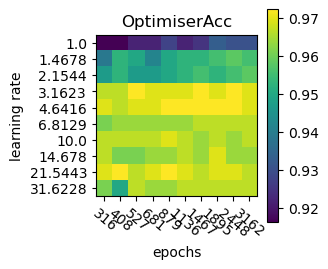

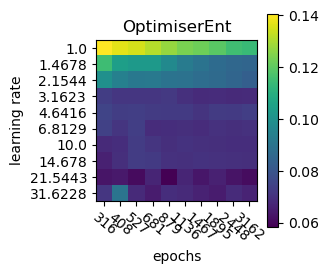

In [16]:
opt = 'Optimiser'
base = f'Data/NrHidden1/{opt}/LrEpoch'
for item in os.listdir(base):
    if item.endswith("_2.npy"):
        plot_lr_epochs(f'{base}/{item}', f"{opt}{item[:3]}.png", f"{opt}{item[:3]}", f"{target}{opt}{item[:3]}.png")

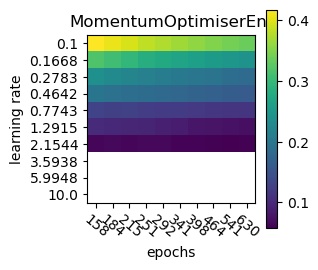

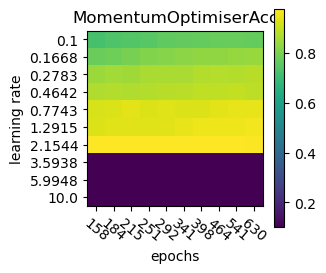

In [17]:
opt = 'MomentumOptimiser'
base = f'Data/NrHidden1/{opt}/LrEpoch'
for item in os.listdir(base):
    if item.endswith("_2.npy"):
        plot_lr_epochs(f'{base}/{item}', f"{opt}{item[:3]}.png", f"{opt}{item[:3]}", f"{target}{opt}{item[:3]}.png")

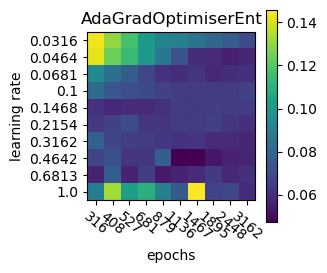

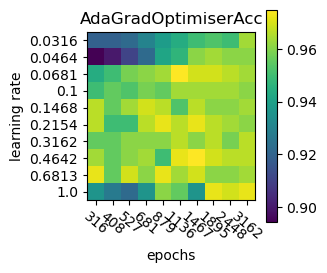

In [18]:
opt = 'AdaGradOptimiser'
base = f'Data/NrHidden1/{opt}/LrEpoch'
for item in os.listdir(base):
    if item.endswith("_2.npy"):
        plot_lr_epochs(f'{base}/{item}', f"{opt}{item[:3]}.png", f"{opt}{item[:3]}", f"{target}{opt}{item[:3]}.png")

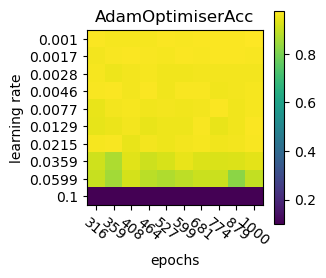

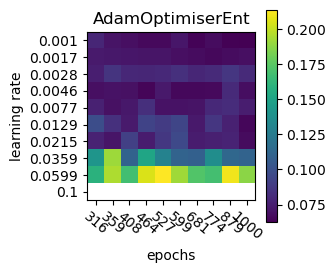

In [19]:
opt = 'AdamOptimiser'
base = f'Data/NrHidden1/{opt}/LrEpoch'
for item in os.listdir(base):
    if item.endswith("_2.npy"):
        plot_lr_epochs(f'{base}/{item}', f"{opt}{item[:3]}.png", f"{opt}{item[:3]}", f"{target}{opt}{item[:3]}.png")

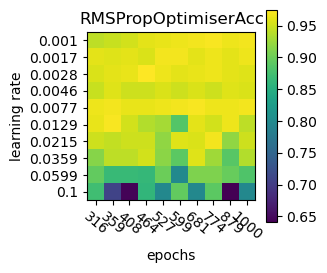

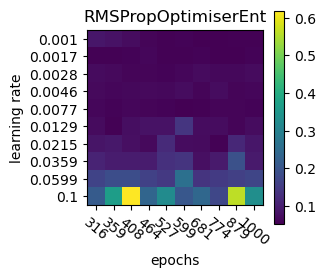

In [21]:
opt = 'RMSPropOptimiser'
base = f'Data/NrHidden1/{opt}/LrEpoch'
for item in os.listdir(base):
    if item.endswith("_2.npy"):
        plot_lr_epochs(f'{base}/{item}', f"{opt}{item[:3]}.png", f"{opt}{item[:3]}", f"{target}{opt}{item[:3]}.png")